# Polynômes orthogonaux multivariés : application au cas de la déviation verticale d'une poutre encastrée


## Références

* http://openturns.github.io/openturns/master/theory/meta_modeling/chaos_basis.html
* http://openturns.github.io/openturns/master/theory/meta_modeling/orthorgonal_polynomials.html
* http://openturns.github.io/openturns/master/user_manual/_generated/openturns.LinearEnumerateFunction.html
* http://openturns.github.io/openturns/master/user_manual/_generated/openturns.HyperbolicAnisotropicEnumerateFunction.html

## Définir des polynômes univariés

Dans cette partie, on montre comment définir des polynômes univariés dans OT. Nous voyons comment créer la famille de polynômes orthogonaux associé à une variable aléatoire. Nous analysons la mesure associée à une famille de polynômes orthogonaux et montrons comment dessiner les polynômes.

In [1]:
import openturns as ot

Pour commencer, on définit une variable aléatoire de loi uniforme.

In [2]:
dist_L = ot.Uniform(250., 260.) # in cm

Puis on créée le polynôme univarié associé à cette variable avec la classe `StandardPolynomialFactory`.

In [3]:
factory_L = ot.StandardDistributionPolynomialFactory(dist_L)
factory_L

class=StandardDistributionPolynomialFactory hasSpecificFamily=true specificFamily=class=OrthogonalUniVariatePolynomialFamily implementation=class=LegendreFactory measure=class=Uniform name=Uniform dimension=1 a=-1 b=1

On observe que les polynômes orthogonaux associés à la loi uniforme sont les polynômes de Legendre.

Pour générer le polynôme de degré zéro associée à cette famille, on utilise la méthode `build`.

In [4]:
P0 = factory_L.build(0)
P0

<openturns.orthogonalbasis.OrthogonalUniVariatePolynomial; proxy of <Swig Object of type 'OT::OrthogonalUniVariatePolynomial *' at 0x0000021144F7A390> >

Pour toute famille de polynômes orthogonaux, le polynôme de degré zéro est toujours égal à 1. Observons les polynômes de degrés 0 à 5 :

In [5]:
for i in range(5):
    Pi = factory_L.build(i)
    print(Pi)

1
1.73205 * X
-1.11803 + 3.3541 * X^2
-3.96863 * X + 6.61438 * X^3
1.125 - 11.25 * X^2 + 13.125 * X^4


Pour toute famille de polynômes orthogonaux, on *standardise* la densité de probabilité pour obtenir une famille dont les paramètres sont constants : dans OpenTURNS, on nomme cette distribution la *mesure*. La méthode `getMeasure` permet de l'obtenir :

In [6]:
measure = factory_L.getMeasure()
measure

class=Uniform name=Uniform dimension=1 a=-1 b=1

Comme cette distribution est uniforme, on peut facilement obtenir les bornes associées avec la methode `getRange`. 

In [7]:
Lrange = measure.getRange()
Lmin = Lrange.getLowerBound()[0]
Lmax = Lrange.getUpperBound()[0]
print(Lmin)
print(Lmax)

-1.0
1.0


On souhaite ensuite dessiner le polynôme orthogonal de degré 6 : on utilise la méthode `draw`.

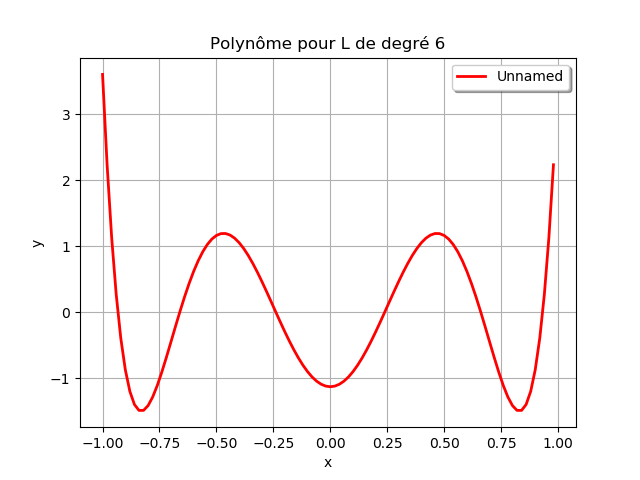

In [8]:
P6 = factory_L.build(6)
graph = P6.draw(Lmin,Lmax,100)
graph.setTitle("Polynôme pour L de degré 6")
graph

## Définir des polyômes multivariés

Dans cette partie, nous allons voir comment définir des polynômes multivariés à partir d'un vecteur aléatoire dont les marginales sont indépendantes. 
Pour commencer, nous devons définir les lois de distributions des variables aléatoires. 

In [9]:
dist_E = ot.Beta(0.9, 3.1, 2.8e7, 4.8e7)
F_para = ot.LogNormalMuSigma(3.0e4, 9.0e3, 15.0e3) # in N
dist_F = ot.ParametrizedDistribution(F_para)
dist_L = ot.Uniform(250., 260.) # in cm
dist_I = ot.Beta(2.5, 4, 310., 450.) # in cm^4

La classe `OrthogonalProductPolynomialFactory` permet de définir une collection de polynômes univariés.

In [10]:
multivariateBasis = ot.OrthogonalProductPolynomialFactory([dist_E, dist_F, dist_L, dist_I])

La méthode `getEnumerateFunction` permet d'obtenir la règle d'énumération des polynômes multivariés. Par défaut, c'est la règle linéaire qui est utilisée.

In [11]:
enumfunc = multivariateBasis.getEnumerateFunction()
enumfunc

class=LinearEnumerateFunction dimension=4

La méthode `getStrataCumulatedCardinal` permet d'obtenir le nombre de multi-indices de degré total inférieur ou égal au degré donné.

In [44]:
totalDegree = 5
P = enumfunc.getStrataCumulatedCardinal(totalDegree)

Dans la boucle suivante, on fait une boucle sur tous les polynômes de degré total inférieur ou égal à `P`. Pour chaque polynôme, on évalue la règle d'énumération pour obtenir le multi-indice associé. 

In [45]:
print('Total degree' + '     ' + 'Multi-index')
for i in range(P):
    multiindex = enumfunc(i)
    degree = sum(multiindex)
    print(str(int(degree))+' '*15+str(multiindex))

Total degree     Multi-index
0               [0,0,0,0]
1               [1,0,0,0]
1               [0,1,0,0]
1               [0,0,1,0]
1               [0,0,0,1]
2               [2,0,0,0]
2               [1,1,0,0]
2               [1,0,1,0]
2               [1,0,0,1]
2               [0,2,0,0]
2               [0,1,1,0]
2               [0,1,0,1]
2               [0,0,2,0]
2               [0,0,1,1]
2               [0,0,0,2]
3               [3,0,0,0]
3               [2,1,0,0]
3               [2,0,1,0]
3               [2,0,0,1]
3               [1,2,0,0]
3               [1,1,1,0]
3               [1,1,0,1]
3               [1,0,2,0]
3               [1,0,1,1]
3               [1,0,0,2]
3               [0,3,0,0]
3               [0,2,1,0]
3               [0,2,0,1]
3               [0,1,2,0]
3               [0,1,1,1]
3               [0,1,0,2]
3               [0,0,3,0]
3               [0,0,2,1]
3               [0,0,1,2]
3               [0,0,0,3]
4               [4,0,0,0]
4               [3,1,0,0]
4        

## Exercices

### Exercice 1 : polynômes orthogonaux pour une variable gaussienne

* Créer la famille de polynômes orthogonaux associés à une variable $X$ de loi normale de moyenne 12 et d'écart-type 3.4 :
```
N = ot.Normal(12.,3.4)
```
* Quelle est la famille de polynômes orthogonaux associés à cette variable ?
* Afficher les polynômes de degrés 0 à 5 associés.
* Quelle est la mesure standard associée ?
* On souhaite dessiner le polynôme de degré 6 associé à cette mesure : pourquoi ne peut-on pas utiliser la méthode `getRange` pour déterminer les bornes ? 
* Utiliser la méthode `computeBilateralConfidenceInterval` pour déterminer l'intervalle de confiance à 95% : en déduire des bornes pour dessiner le polynôme.
* Dessiner le polynôme de degré 6 associé à cette mesure.



### Exercice 2 : polynômes orthogonaux pour la variable $F$

* Créer la famille de polynômes orthogonaux associés à la variable $F$ :
```
F_para = ot.LogNormalMuSigma(3.0e4, 9.0e3, 15.0e3) # in N
dist_F = ot.ParametrizedDistribution(F_para)
```
* Quelle est la famille de polynômes orthogonaux associés à cette variable ?
* Afficher les polynômes de degrés 0 à 5 associés.
* Quelle est la mesure standard associée ?
* On souhaite dessiner le polynôme de degré 6 associé à cette mesure : pourquoi ne peut-on pas utiliser la méthode `getRange` pour déterminer les bornes ? 
* Utiliser la méthode `computeBilateralConfidenceInterval` pour déterminer l'intervalle de confiance à 95% : en déduire des bornes pour dessiner le polynôme.
* Dessiner le polynôme de degré 6 associé à cette mesure.

### Exercice 3 : règle d'énumération linéaire

On considère l'exemple de la poutre $(E,F,L,I)$. On note $\pi^E_j$, $\pi^F_j$, $\pi^L_j$ et $\pi^I_j$ la famille de polynôme univariés associés. Pour la base multivariée `multivariateBasis` définie précédemment, on considère la règle d'énumération par défaut. On se concentre ici sur le 52-ème multi-indice.

* Utiliser la fonction `enumfunc` pour obtenir et afficher le 52-ème multi-indice ?
* Décrire *en français* le lien entre ce multi-indice et les polynômes univariés associés : pour chaque composante de $\alpha$, décrire le degré du polynôme univarié et la variable E, F, L ou I associée. Ecrire le polynôme multivarié $\psi_\alpha$ associé en fonction des polynômes univariés $\pi^E_j$, $\pi^F_j$, $\pi^L_j$ et $\pi^I_j$.
* Quel est le degré total de ce polynôme multivarié ?
* Utiliser la méthode `build` de l'objet `multivariateBasis` pour calculer et afficher le polynôme $\psi_\alpha$ correspondant.

### Exercice 4 : règle d'énumération hyperbolique

La règle d'énumération linéaire est associée à un ordre d'énumération des multi-indices tel que chaque les interactions d'ordre élevée entre les variables apparaissent souvent. Or, dans beaucoup de modèles physiques, les interactions entre variables sont moins importantes. 

La règle d'énumération hyperbolique permet de générer un ordre tel que les interactions sont moins fréquentes dans le modèle. Pour un paramètre $q\in]0,1]$ donné et des poids $w\in\mathbf{R}^n$ donnés, la norme $\|\cdot\|_{w,q}$ d'un multi-indice $\alpha$ est définie par :
$$
\|\cdot\|_{w,q} = \left( \sum_{i=1}^n w_i \alpha_i^q \right)^{\frac{1}{q}}.
$$

* Utiliser la classe `HyperbolicAnisotropicEnumerateFunction` pour définir une règle hyperbolique de paramètre $q=0.5$ en dimension 4 avec les poids $w$ par défaut. 
* Afficher les 10 premiers multi-indices associés à cette règle.
* Utiliser la méthode `getWeight` pour récupérer le vecteur des poids.


### Exercice 5 : utilisation d'une règle d'énumération

Le second argument de la classe `OrthogonalProductPolynomialFactory` permet de spécifier une règle d'énumération choisie par l'utilisateur. Dans ce cas, le premier argument doit être une liste de polynômes orthogonaux univariés, ou, plus précisément, une instance de la classe `PolynomialFamilyCollection`. 

* Utiliser le script suivant pour définir une collection de polynômes orthogonaux univariés.
```
marginals = [dist_E, dist_F, dist_L, dist_I]
stdPolyColl = [ot.StandardDistributionPolynomialFactory(m) for m in marginals]
polyColl = ot.PolynomialFamilyCollection(stdPolyColl)
```
* Utiliser l'instruction suivante pour définir la base orthogonale tensoriée associée à la règle d'énumération de votre choix.
```
multivariateBasis = ot.OrthogonalProductPolynomialFactory(polyColl, enumfunc)
```
* Utiliser la méthode `getNodesAndWeights` pour récupérer les noeuds et les poids de la quadrature de Gauss tensorisée associée à ce polynôme orthogonal multivarié.

### Exercice 6 : nombre de polynômes

Avec la règle d'énumération linéaire par défaut, on souhaite créer un graphique qui représente le nombre de polynômes $P$ en fonction du degré total `p`. 
* Créer une boucle `for` sur le degré total `p` entre 1 et 15. Pour chaque valeur de `p`, utiliser la méthode `getStrataCumulatedCardinal` de la fonction d'énumération pour obtenir le nombre de polynômes de degré inférieur ou égal à `p`.
* Utiliser Pylab pour créer le graphique.